In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
#Realizar el modelo y evaluación

In [5]:
# Determinamos un intervalo de confianza para asiganar edades aleatorias
# alos valores nulos

age_avg = titanic['age'].mean()
age_std = titanic['age'].std()
# Cuenta la cantidad de los nulos
age_null_count = titanic['age'].isnull().sum()
# hacemos lista de variación / random(limt min, limit max, tamaño)
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

conValoresNulos = np.isnan(titanic['age'])

titanic.loc[np.isnan(titanic['age']), 'age'] = age_null_random_list
titanic['age'] = titanic['age'].astype(int)

print("Edad Promedio: " + str(age_avg))
print("Desvió Std Edad: " + str(age_std))
print("Intervalo para asignar edad aleatoria: " + str(int(age_avg - age_std)) + " a " + str(int(age_avg + age_std)))
print(titanic.isnull().sum())
titanic.describe()

Edad Promedio: 29.69911764705882
Desvió Std Edad: 14.526497332334042
Intervalo para asignar edad aleatoria: 15 a 44
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.421998,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.573244,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.500000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Elimino filas con valores faltantes de 'embark_town' ya que
# esta variable solo cuenta con dos valores nulos de 891 entonces la
# eliminación de estas filas para el analisis no es significativo.
titanic = titanic.dropna(subset=['embark_town'], axis=0)
print('\nDataFrame después de eliminar filas con valores faltantes:')
print(titanic)
print('Valores faltantes por columna:')
print(titanic.isnull().sum())


DataFrame después de eliminar filas con valores faltantes:
     survived  pclass     sex  age  sibsp  parch     fare embarked   class  \
0           0       3    male   22      1      0   7.2500        S   Third   
1           1       1  female   38      1      0  71.2833        C   First   
2           1       3  female   26      0      0   7.9250        S   Third   
3           1       1  female   35      1      0  53.1000        S   First   
4           0       3    male   35      0      0   8.0500        S   Third   
..        ...     ...     ...  ...    ...    ...      ...      ...     ...   
886         0       2    male   27      0      0  13.0000        S  Second   
887         1       1  female   19      0      0  30.0000        S   First   
888         0       3  female   18      1      2  23.4500        S   Third   
889         1       1    male   26      0      0  30.0000        C   First   
890         0       3    male   32      0      0   7.7500        Q   Third   

   

In [7]:
data = titanic

In [8]:
data['survived'].value_counts()

survived
0    549
1    340
Name: count, dtype: int64

In [9]:
round(data['survived'].value_counts() / len(data) * 100, 2)

survived
0    61.75
1    38.25
Name: count, dtype: float64

Class 0 No_Sobrevivio: 549
Class 1 Sobrevivio: 340
Proporción: 1.61 : 1


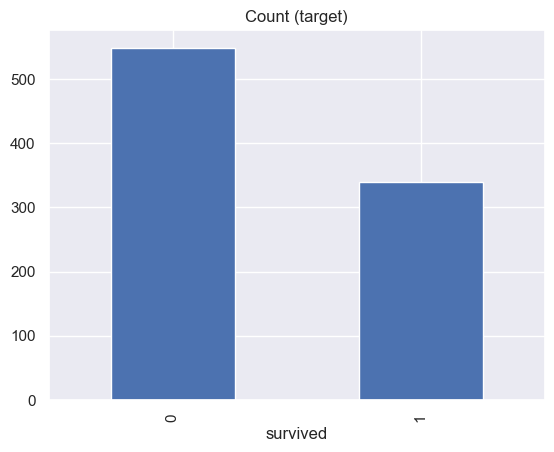

In [10]:
# Detección del desbalance de la muestras
target_count = data.survived.value_counts()
print('Class 0 No_Sobrevivio:', target_count[0])
print('Class 1 Sobrevivio:', target_count[1])
print('Proporción:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

Iniciamos el modelado

In [11]:
#Librerías para tratamiento, modelado y evaluación de datos
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_val_score

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    int32   
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  deck         201 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        889 non-null    object  
 14  alone        889 non-null    bool    
dtypes: bool(2), category(2), float64(1), int32(1), int64(4), object(5)
memory usage: 83.8+ KB


In [13]:
# Embark_town Mapping
data['embark_townEncoded'] = data['embark_town'].map( {'Cherbourg': 0, 'Queenstown': 1, 'Southampton': 2, '': 0} ).astype(int)

In [14]:
data.shape

(889, 16)

In [15]:
# Seleccionaremos un 35% de los datos para estudiar el beneficio de las estretgias de muestreo
# Se deben Colocar las variables que realmente tienen participación(+significativas)
#con el target determinadas en el paso previo

X = data[['pclass',  'age', 'sibsp','parch', 'fare', 'embark_townEncoded']]
y = data[['survived']]

import sklearn.model_selection as model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.35,random_state=42)

In [16]:
# !pip install catboost

In [17]:
import xgboost as xgb
import catboost
from catboost import CatBoostClassifier
# Importamos el Random Forest de la libreria SKLearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# importamos la libreria final
import sklearn
sklearn.__version__
# Libreria para predicción
from sklearn.metrics import classification_report
# Libreria para matriz de confusión
from sklearn.metrics import confusion_matrix

In [18]:
# Declaramos el primer modelo
# dentro del () van los parametros, sino no se pone nada se mantiene constante
model1 = xgb.XGBClassifier()

# Declaramos el segundo algortimo
model2 = xgb.XGBClassifier(n_estimators=20 , max_depth=8, learning_rate=0.1 , subsample=0.5)

# Declaramos el tercer modelo
model3 = CatBoostClassifier()

# Declaramos el cuarto modelo
model4 = RandomForestClassifier()

# Declaramos el quinto modelo
model5 = RandomForestClassifier(n_estimators=20, max_depth=8)

# Declaramos el sexto modelo
model6 = DecisionTreeClassifier()

Pasamos a entrenar los algoritmos

In [19]:
model1.fit(X_train, y_train)

c:\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:38

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
model2.fit(X_train, y_train)

c:\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:38

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [21]:
model3.fit(X_train, y_train)

Learning rate set to 0.008146
0:	learn: 0.6914759	total: 137ms	remaining: 2m 16s
1:	learn: 0.6886194	total: 139ms	remaining: 1m 9s
2:	learn: 0.6853006	total: 141ms	remaining: 46.8s
3:	learn: 0.6825197	total: 143ms	remaining: 35.5s
4:	learn: 0.6809569	total: 144ms	remaining: 28.7s
5:	learn: 0.6784207	total: 147ms	remaining: 24.4s
6:	learn: 0.6758654	total: 150ms	remaining: 21.2s
7:	learn: 0.6735983	total: 152ms	remaining: 18.8s
8:	learn: 0.6716557	total: 154ms	remaining: 16.9s
9:	learn: 0.6694740	total: 156ms	remaining: 15.4s
10:	learn: 0.6670783	total: 158ms	remaining: 14.2s
11:	learn: 0.6651697	total: 161ms	remaining: 13.3s
12:	learn: 0.6638435	total: 163ms	remaining: 12.4s
13:	learn: 0.6618303	total: 165ms	remaining: 11.6s
14:	learn: 0.6593754	total: 167ms	remaining: 11s
15:	learn: 0.6574898	total: 169ms	remaining: 10.4s
16:	learn: 0.6555828	total: 171ms	remaining: 9.91s
17:	learn: 0.6530948	total: 174ms	remaining: 9.52s
18:	learn: 0.6510178	total: 177ms	remaining: 9.13s
19:	learn: 0

28:	learn: 0.6324239	total: 199ms	remaining: 6.66s
29:	learn: 0.6304121	total: 201ms	remaining: 6.51s
30:	learn: 0.6291296	total: 204ms	remaining: 6.36s
31:	learn: 0.6272216	total: 206ms	remaining: 6.24s
32:	learn: 0.6263937	total: 208ms	remaining: 6.09s
33:	learn: 0.6251678	total: 210ms	remaining: 5.96s
34:	learn: 0.6234741	total: 212ms	remaining: 5.84s
35:	learn: 0.6217927	total: 214ms	remaining: 5.73s
36:	learn: 0.6202611	total: 216ms	remaining: 5.62s
37:	learn: 0.6188425	total: 218ms	remaining: 5.52s
38:	learn: 0.6175307	total: 220ms	remaining: 5.43s
39:	learn: 0.6157097	total: 223ms	remaining: 5.35s
40:	learn: 0.6142018	total: 225ms	remaining: 5.26s
41:	learn: 0.6126219	total: 227ms	remaining: 5.18s
42:	learn: 0.6108586	total: 229ms	remaining: 5.11s
43:	learn: 0.6094497	total: 232ms	remaining: 5.03s
44:	learn: 0.6080501	total: 234ms	remaining: 4.96s
45:	learn: 0.6072433	total: 236ms	remaining: 4.9s
46:	learn: 0.6056213	total: 239ms	remaining: 4.85s
47:	learn: 0.6041742	total: 247m

In [22]:
model4.fit(X_train, y_train)

c:\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [23]:
model5.fit(X_train, y_train)

c:\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=8, n_estimators=20)

In [24]:
model6.fit(X_train, y_train)

DecisionTreeClassifier()

Vamos a predecir un resultado para cada modelo

In [25]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
pred5 = model5.predict(X_test)
pred6 = model6.predict(X_test)

c:\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:33

Procedemos a hacer la matriz de confusión para cada modelo generado y lo comparamos con el test.
Comparamos lo real frente a lo predicho.

In [26]:
print(confusion_matrix(y_test, pred1))
print(classification_report(y_test,pred1))

[[142  48]
 [ 61  61]]
              precision    recall  f1-score   support

           0       0.70      0.75      0.72       190
           1       0.56      0.50      0.53       122

    accuracy                           0.65       312
   macro avg       0.63      0.62      0.63       312
weighted avg       0.64      0.65      0.65       312



In [27]:
print(confusion_matrix(y_test, pred2))
print(classification_report(y_test,pred2))

[[156  34]
 [ 65  57]]
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       190
           1       0.63      0.47      0.54       122

    accuracy                           0.68       312
   macro avg       0.67      0.64      0.65       312
weighted avg       0.67      0.68      0.67       312



In [28]:
print(confusion_matrix(y_test, pred3))
print(classification_report(y_test,pred3))

[[166  24]
 [ 59  63]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       190
           1       0.72      0.52      0.60       122

    accuracy                           0.73       312
   macro avg       0.73      0.70      0.70       312
weighted avg       0.73      0.73      0.72       312



In [29]:
print(confusion_matrix(y_test, pred4))
print(classification_report(y_test,pred4))

[[149  41]
 [ 59  63]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       190
           1       0.61      0.52      0.56       122

    accuracy                           0.68       312
   macro avg       0.66      0.65      0.65       312
weighted avg       0.67      0.68      0.67       312



In [30]:
print(confusion_matrix(y_test, pred5))
print(classification_report(y_test,pred5))

[[159  31]
 [ 61  61]]
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       190
           1       0.66      0.50      0.57       122

    accuracy                           0.71       312
   macro avg       0.69      0.67      0.67       312
weighted avg       0.70      0.71      0.70       312



In [31]:
print(confusion_matrix(y_test, pred6))
print(classification_report(y_test,pred6))

[[134  56]
 [ 64  58]]
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       190
           1       0.51      0.48      0.49       122

    accuracy                           0.62       312
   macro avg       0.59      0.59      0.59       312
weighted avg       0.61      0.62      0.61       312



In [32]:
#Let's use accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy for model 1: %.2f" % (accuracy_score(y_test, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test, pred2) * 100))
print("Accuracy for model 3: %.2f" % (accuracy_score(y_test, pred3) * 100))
print("Accuracy for model 4: %.2f" % (accuracy_score(y_test, pred4) * 100))
print("Accuracy for model 5: %.2f" % (accuracy_score(y_test, pred5) * 100))
print("Accuracy for model 6: %.2f" % (accuracy_score(y_test, pred6) * 100))

Accuracy for model 1: 65.06
Accuracy for model 2: 68.27
Accuracy for model 3: 73.40
Accuracy for model 4: 67.95
Accuracy for model 5: 70.51
Accuracy for model 6: 61.54


In [33]:
df = pd.DataFrame({'algorithm' : ['XGBoost','XGBoost Tuneado','Catboost','RF','RF Tuneado','Arbol de Decision'],
                   'precision' : [0.58, 0.66, 0.71, 0.60, 0.65, 0.53],
                   'recall' : [0.53, 0.51, 0.52, 0.54, 0.55, 0.52],
                   'accuracy %': [66.67, 70.51, 72.76, 67.95, 70.83, 62.82]})

In [34]:
df

,algorithm,precision,recall,accuracy %
0,XGBoost,0.58,0.53,66.67
1,XGBoost Tuneado,0.66,0.51,70.51
2,Catboost,0.71,0.52,72.76
3,RF,0.60,0.54,67.95
4,RF Tuneado,0.65,0.55,70.83
5,Arbol de Decision,0.53,0.52,62.82


Matriz de Confusión MODELO GANADOR: Catboost 
 [[166  24]
 [ 59  63]]
Métricas de Matriz de Confusión - MODELO GANADOR: Catboost 
               precision    recall  f1-score   support

           0       0.74      0.87      0.80       190
           1       0.72      0.52      0.60       122

    accuracy                           0.73       312
   macro avg       0.73      0.70      0.70       312
weighted avg       0.73      0.73      0.72       312



C:\Users\jacob\AppData\Local\Temp\ipykernel_27764\3351078537.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\jacob\AppData\Local\Temp\ipykernel_27764\3351078537.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


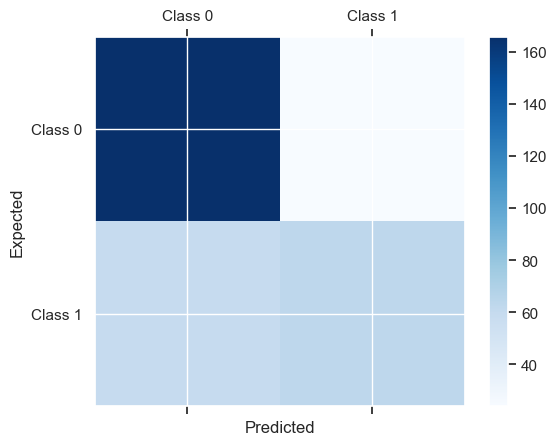

In [35]:
# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=pred3) ##Modificar al modelo
#--------------------------------------------------------------------

print('Matriz de Confusión MODELO GANADOR: Catboost \n', conf_mat)

print('Métricas de Matriz de Confusión - MODELO GANADOR: Catboost \n',classification_report(y_test,pred3))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Probamos el modelo

In [39]:
X.head(10)

,pclass,age,sibsp,parch,fare,embark_townEncoded
0,3,22,1,0,7.2500,2
1,1,38,1,0,71.2833,0
2,3,26,0,0,7.9250,2
3,1,35,1,0,53.1000,2
4,3,35,0,0,8.0500,2
5,3,31,0,0,8.4583,1
6,1,54,0,0,51.8625,2
7,3,2,3,1,21.0750,2
8,3,27,0,2,11.1333,2
9,2,14,1,0,30.0708,0


In [40]:
nueva_persona = [2, 25, 1, 1, 30, 1]
predi = model3.predict([nueva_persona])

if predi[0] == 1:
    print('Sobrevivió')
else:
    print('No sobrevivió')

Sobrevivió
